In [1]:
#%matplotlib notebook
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import date
import openweathermapy.core as owm
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/cities.csv"
# Output files (PNG)
temp_file="Resources/images/Fig1.jpg"
humidity_file="Resources/images/Fig2.jpg"
cloud_file="Resources/images/Fig3.jpg"
wind_file="Resources/images/Fig4.jpg"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#date for labeling graphs
today=str(date.today())

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


610

## Perform API Calls

In [3]:
# OpenWeatherMap url = "http://api.openweathermap.org/data/2.5/weather?"
# Create settings dictionary with information we're interested in
settings = {"units": "imperial", "appid": api_key}
summary=["name","id","coord.lat","wind.speed","main.temp","main.humidity","clouds.all"]


In [4]:
summary_data=[]
for city in cities:
    try:
        current_weather=owm.get_current(city, **settings)
        city_data=current_weather(*summary)
        summary_data.append(city_data)
        print(f"Processing {current_weather['name']} with id {current_weather['id']} ")        
    except:
        print(f"{city} not found")

#convert to dataframe and name columns        
summary_df=pd.DataFrame(summary_data)
summary_df=summary_df.rename(columns={0:"name",1:"id",2:"lat",3:"windspeed",4:"temp",5:"humidity",6:"cloudiness"})
#save to file
summary_df.to_csv(output_data_file,index=False,header=True)
#confirm sufficient count after cities found
summary_df.count()

Processing Atuona with id 4020109 
Processing Kodiak with id 4407665 
Processing Kapaa with id 5848280 
Processing Dzaoudzi with id 921900 
Processing Touros with id 3386213 
Processing Los Llanos de Aridane with id 2514651 
Processing Lompoc with id 5367788 
bargal not found
Processing Ahuimanu with id 5856516 
Processing Rocha with id 3440777 
Processing Bandarbeyla with id 64814 
taolanaro not found
Processing Bredasdorp with id 1015776 
Processing Matale with id 1241622 
Processing Mahebourg with id 934322 
Processing Provideniya with id 4031574 
Processing Torbay with id 6167817 
Processing Nikolskoye with id 546105 
belushya guba not found
Processing Busselton with id 2075265 
Processing Qaanaaq with id 3831208 
Processing Soderhamn with id 2676224 
Processing Sertanopolis with id 3447658 
nguiu not found
Processing Rikitea with id 4030556 
Processing Lagoa with id 2267254 
Processing Porterville with id 5384471 
Processing Jamestown with id 2069194 
Processing Hithadhoo with id 

Processing Narsaq with id 3421719 
Processing Changping with id 2038154 
Processing Malanville with id 2392837 
Processing Mar del Plata with id 3863379 
Processing Skegness with id 2637762 
Processing Kindu with id 212902 
Processing Zolochiv with id 686895 
ningan not found
Processing Eastlake with id 3981609 
Processing Aleksandrovskiy Zavod with id 2027933 
Processing Chokurdakh with id 2126123 
Processing Saskylakh with id 2017155 
Processing Ribeira Grande with id 3372707 
Processing Avera with id 4231997 
Processing Rasulnagar with id 1167064 
Processing Umm Kaddadah with id 364933 
Processing Tuatapere with id 2180815 
Processing Ceres with id 3862100 
Processing Fuyu with id 2037334 
lolua not found
Processing San Cristobal with id 3652462 
warqla not found
Processing Biak with id 1637001 
sofiysk not found
Processing Petatlan with id 3992842 
Processing Nandu with id 6957978 
Processing Plettenberg Bay with id 964712 
Processing Finnsnes with id 3157549 
Processing Pangnirtun

Processing Alofi with id 4036284 
Processing Nome with id 4732862 
Processing Williamsport with id 5219585 
Processing Lubango with id 3347762 
Processing San Juan with id 3837213 
Processing Soe with id 587876 
Processing Kununurra with id 2068110 
Processing Cayenne with id 3382160 
Processing Paamiut with id 3421193 
Processing Merrill with id 5572979 
Processing Limulunga with id 910361 
Processing Padang with id 1633419 
Processing Deputatskiy with id 2028164 
Processing Carutapera with id 3402648 
Processing Katsuura with id 1865309 
ndende not found
Processing Taltal with id 3870243 
Processing Gushikawa with id 1863495 
Processing Shubarshi with id 608270 
Processing Karachi with id 1174872 
Processing Sao Filipe with id 3374210 
Processing Bella Union with id 3681990 
Processing Teluknaga with id 1990589 
Processing Tautira with id 4033557 
Processing Kasangulu with id 2315057 
Processing Brzeg Dolny with id 3102456 
vedaranniyam not found
Processing Ouesso with id 2255564 
Pr

name          549
id            549
lat           549
windspeed     549
temp          549
humidity      549
cloudiness    549
dtype: int64

In [5]:
summary_df.head()

,name,id,lat,windspeed,temp,humidity,cloudiness
0,Atuona,4020109,-9.80,6.42,81.33,100,20
1,Kodiak,4407665,39.95,12.75,14.07,66,1
2,Kapaa,5848280,22.08,20.80,70.43,53,75
3,Dzaoudzi,921900,-12.79,12.75,84.20,83,75
4,Touros,3386213,-5.20,3.36,78.80,88,20


In [12]:
#for all scatter plots
def weather_scat (index,column,y_label,fig_title,outfile_name):
    """
    index determines color graph
    column - str for the column in summary_df to use for y values
    y_label - the y axis label (x_axis is latitude values)
    fig-title - the graph title
    outfile_name -  .png file for saving the graph 
    """
    
    colors=("red","blue","grey","green")
    fig,ax=plt.subplots(figsize=(7,7),facecolor="lightgrey")
    ax.set_facecolor('white')
 #set x axis   
    x_axis=summary_df["lat"]
    ax.set_xlabel("Latitude",fontsize=12)
 #set y axis   
    y_data=summary_df[column]
    ax.set_ylabel(y_label,fontsize=12)
#plot and save to file    
    ax.grid()
    fig.suptitle(fig_title, fontsize=16)
    ax.scatter(x_axis,y_data,marker='o',facecolor=colors[index],edgecolor="black")
    plt.savefig(outfile_name)
    plt.show()
    return

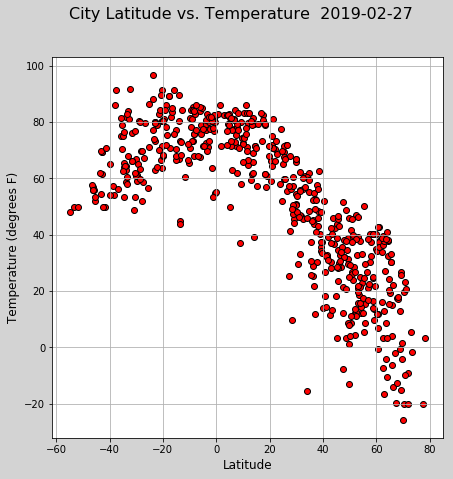

In [13]:
#Temp vs Lat scatterplot
weather_scat(0,"temp","Temperature (degrees F)","City Latitude vs. Temperature  "+today,temp_file)

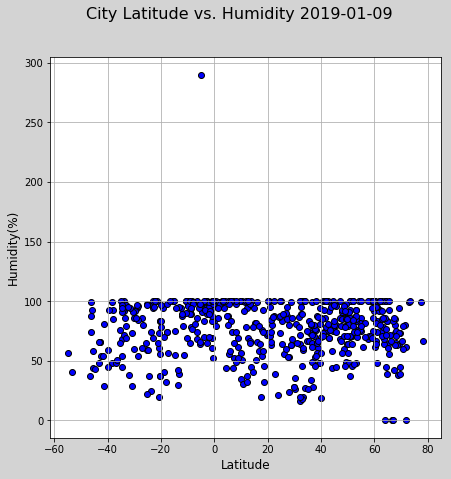

In [11]:
#humidity vs latitude scatterplot
weather_scat(1,"humidity","Humidity(%)","City Latitude vs. Humidity "+today,humidity_file)


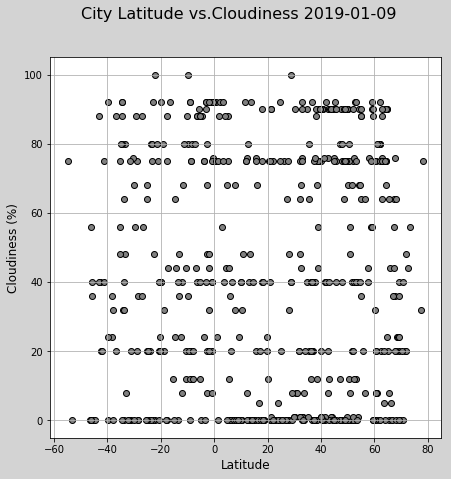

In [9]:
#cloudiness vs latitude
weather_scat(2,"cloudiness","Cloudiness (%)","City Latitude vs.Cloudiness "+today,cloud_file)


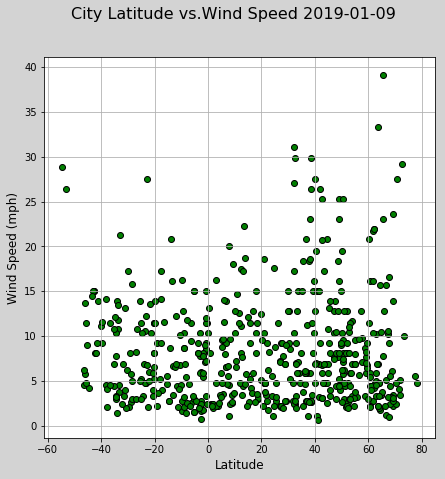

In [10]:
#wind speed vs latitude
weather_scat(3,"windspeed","Wind Speed (mph)","City Latitude vs.Wind Speed "+today,wind_file)
